In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imporing the required libaries

import os,cv2
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import optimizers
from keras import regularizers
from keras import layers,models
from IPython.display import Image
from keras.models import Sequential
from tensorflow.keras import layers
from keras.preprocessing import image
from tensorflow.keras import optimizers
from keras.applications.vgg16 import VGG16
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics import confusion_matrix,classification_report
from keras.layers import Activation, BatchNormalization, Add, Reshape, DepthwiseConv2D
from keras.layers import Dense, MaxPool2D, Flatten, Input, Conv2D, GlobalAveragePooling2D, Dropout

In [ ]:
train_dir="/content/drive/MyDrive/Intern Dataset/train"
test_dir="/content/drive/MyDrive/Intern Dataset/test"
train=pd.read_csv('/content/Train.csv')
test=pd.read_csv('/content/Test.csv')

In [ ]:
train.head(5)
train.Results=train.Results.astype(str)

In [ ]:
print('Train Dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('Test Dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

Train Dataset has 30482 rows and 2 columns
Test Dataset has 400 rows and 2 columns


In [ ]:
#To check the Results values in Train Dataset
train['Results'].value_counts()

positive    16490
negative    13992
Name: Results, dtype: int64

Train Dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


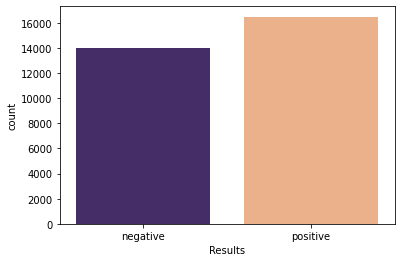

In [ ]:
#to check if the data is balanced
print("Train Dataset")
sns.countplot(train['Results'],palette=['#432371',"#FAAE7B"])
plt.show()

In [ ]:
#To check the Results values in Test Dataset
test['Results'].value_counts()

negative    200
positive    200
Name: Results, dtype: int64

Test Dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


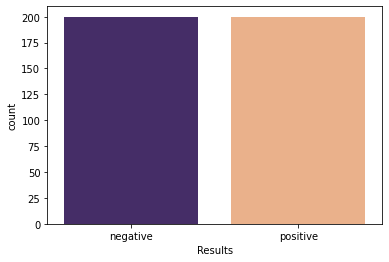

In [ ]:
print("Test Dataset")
sns.countplot(test['Results'],palette=['#432371',"#FAAE7B"])
plt.show()

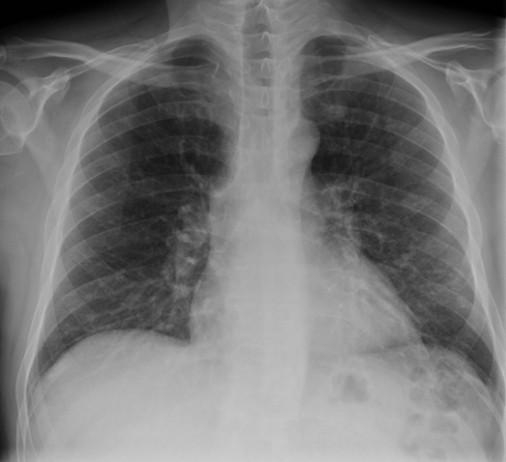

In [ ]:
Image(os.path.join("/content/drive/MyDrive/Intern Dataset/train",train.iloc[0,0]),width=250,height=250)

In [ ]:
datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:16000],directory=train_dir,x_col='Images',
                                            y_col='Results',class_mode='categorical',batch_size=150,
                                            target_size=(224,224),shuffle= True)


validation_generator=datagen.flow_from_dataframe(dataframe=test[:400],directory=test_dir,x_col='Images',
                                                y_col='Results',class_mode='categorical',batch_size=50,
                                                target_size=(224,224),shuffle = False)

Found 16000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


# **CONVOLUTIONAL NEURAL NETWORKS**

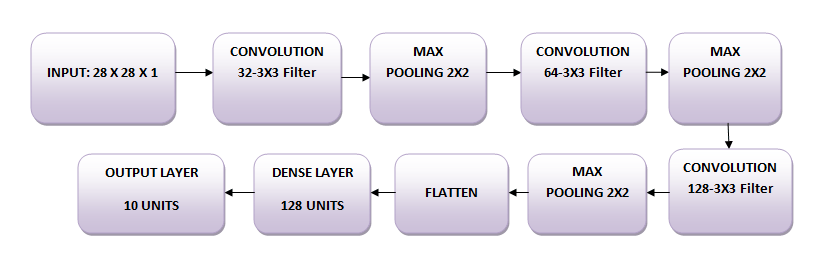

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,batch_size=64,epochs=10,validation_data=validation_generator,verbose=1)


Epoch 1/10
107/107 [==============================] - 154s 1s/step - loss: 0.3665 - accuracy: 0.8282 - val_loss: 0.5383 - val_accuracy: 0.7650
Epoch 2/10
107/107 [==============================] - 146s 1s/step - loss: 0.2366 - accuracy: 0.9033 - val_loss: 0.8524 - val_accuracy: 0.6650
Epoch 3/10
107/107 [==============================] - 147s 1s/step - loss: 0.1800 - accuracy: 0.9323 - val_loss: 0.5359 - val_accuracy: 0.7750
Epoch 4/10
107/107 [==============================] - 148s 1s/step - loss: 0.1229 - accuracy: 0.9551 - val_loss: 0.5555 - val_accuracy: 0.7550
Epoch 5/10
107/107 [==============================] - 148s 1s/step - loss: 0.0967 - accuracy: 0.9662 - val_loss: 0.5164 - val_accuracy: 0.7950
Epoch 6/10
107/107 [==============================] - 148s 1s/step - loss: 0.1086 - accuracy: 0.9595 - val_loss: 0.6064 - val_accuracy: 0.7650
Epoch 7/10
107/107 [==============================] - 147s 1s/step - loss: 0.0597 - accuracy: 0.9795 - val_loss: 0.4989 - val_accuracy: 0.8125

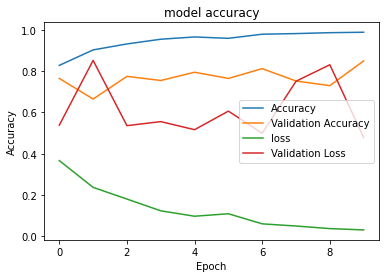

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# **VGG16**

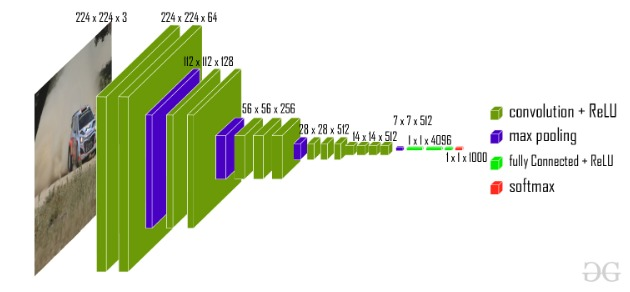

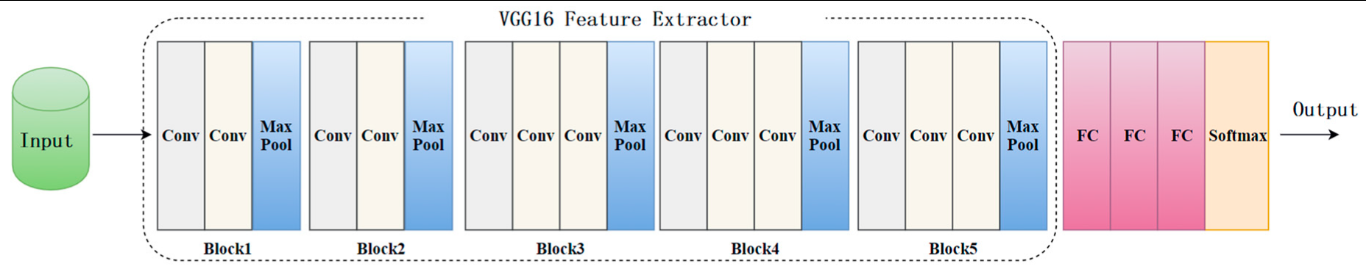

In [ ]:
# Adding the layers
vgg_model = Sequential()
vgg_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
vgg_model.add(Flatten())
vgg_model.add(Dense(units=4096,activation="relu"))
vgg_model.add(Dense(units=4096,activation="relu"))
vgg_model.add(Dense(units=2, activation="softmax"))

In [ ]:
# Using Adam optimiser
opt = Adam(lr=0.004)
vgg_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
# ModelCheckpoint callback - save best weights
checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')

# EarlyStopping
early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

In [ ]:
hist = vgg_model.fit_generator(steps_per_epoch=20,generator=train_generator, validation_data=validation_generator, validation_steps=10,epochs=20,callbacks=[checkpoint,early])

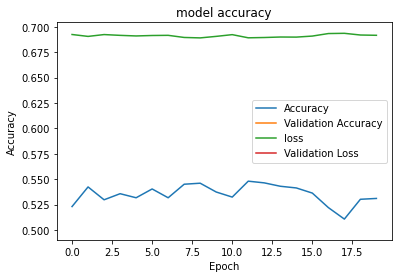

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
vgg_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.6951580047607422, 0.5]

In [ ]:
vgg_predict = vgg_model.predict_generator(validation_generator)
vgg_pre = np.argmax(vgg_predict,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
vgg_acc = accuracy_score(validation_generator.classes, vgg_pre)

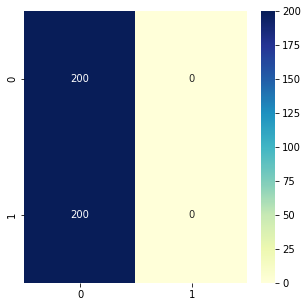


 CLASSIFICATION REPORT :


              precision    recall  f1-score   support

           0       0.50      1.00      0.67       200
           1       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Confusion Matrix and Classification Reports

vgg_cm = confusion_matrix(validation_generator.classes, vgg_pre)
plt.figure(figsize = (5, 5))
sns.heatmap(vgg_cm, annot = True, fmt ='d', cmap = "YlGnBu")
plt.show()
vgg_cr = classification_report(validation_generator.classes,vgg_pre)
print('\n CLASSIFICATION REPORT :\n\n')
print(vgg_cr)

In [ ]:
# vgg_model.save('vgg1.h5')
# vgg_model.save('vgg2.h5')
vgg_model.save('vgg3.h5')

In [ ]:
vgg = load_model('vgg3.h5')
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

# **RESNET50V2**

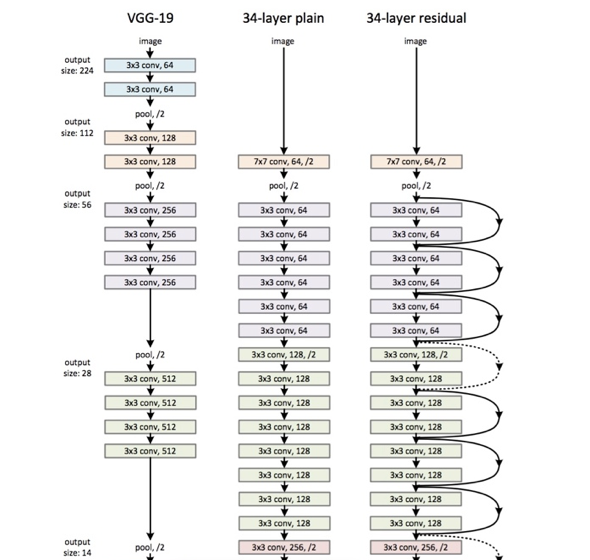

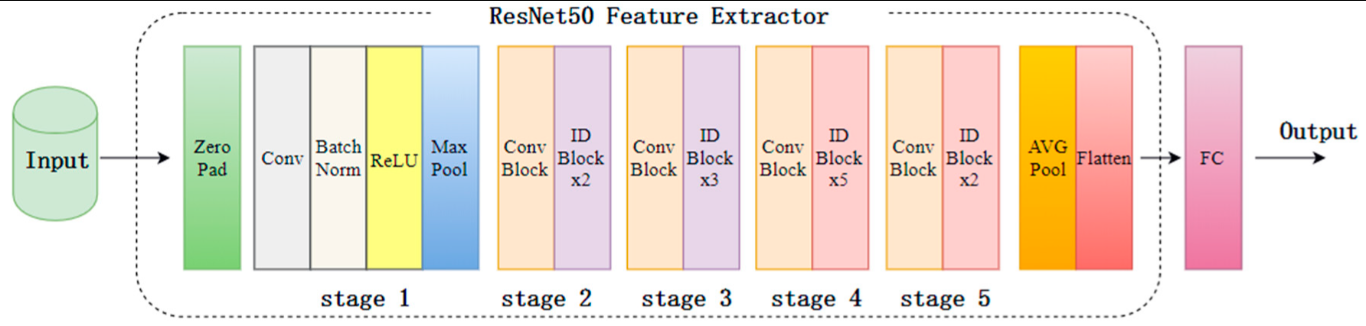

In [ ]:

resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(244,244,3),
    pooling='avg',
    classes=1000,
    #classifier_activation="softmax",
    )

for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(2, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Using Adam optimiser
opt = Adam(lr=0.003)
resnet_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = resnet_model.fit_generator(steps_per_epoch=20,generator=train_generator, validation_data=validation_generator, validation_steps=10,epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
20/20 [==============================] - 47s 2s/step - loss: 0.3179 - accuracy: 0.8633 - val_loss: 0.8835 - val_accuracy: 0.6475
Epoch 2/20
20/20 [==============================] - 24s 1s/step - loss: 0.2009 - accuracy: 0.9136
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 0.1715 - accuracy: 0.9383
Epoch 4/20
20/20 [==============================] - 25s 1s/step - loss: 0.1645 - accuracy: 0.9340
Epoch 5/20
20/20 [==============================] - 25s 1s/step - loss: 0.1431 - accuracy: 0.9443
Epoch 6/20
20/20 [==============================] - 25s 1s/step - loss: 0.1346 - accuracy: 0.9510
Epoch 7/20
20/20 [==============================] - 24s 1s/step - loss: 0.1224 - accuracy: 0.9557
Epoch 8/20
20/20 [==============================] - 24s 1s/step - loss: 0.1190 - accuracy: 0.9550
Epoch 9/20
20/20 [==============================] - 25s 1s/step - loss: 0.1292 - accuracy: 0.9530
Epoch 10/20
20/20 [==============================] - 24s 1s/step - loss: 0.1

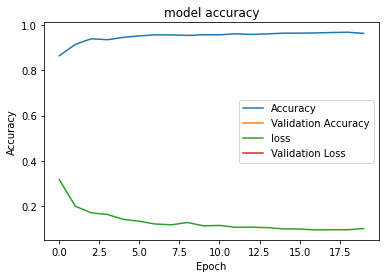

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
resnet_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.6452015042304993, 0.7450000047683716]

In [ ]:
resnet_predict = resnet_model.predict_generator(validation_generator)
resnet_pre = np.argmax(resnet_predict,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
resnet_acc = accuracy_score(validation_generator.classes, resnet_pre)

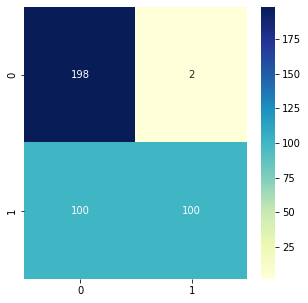


 CLASSIFICATION REPORT :


              precision    recall  f1-score   support

           0       0.66      0.99      0.80       200
           1       0.98      0.50      0.66       200

    accuracy                           0.74       400
   macro avg       0.82      0.74      0.73       400
weighted avg       0.82      0.74      0.73       400



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

resnet_cm = confusion_matrix(validation_generator.classes, resnet_pre)
plt.figure(figsize = (5, 5))
sns.heatmap(resnet_cm, annot = True, fmt ='d', cmap = "YlGnBu")
plt.show()
resnet_cr = classification_report(validation_generator.classes,resnet_pre)
print('\n CLASSIFICATION REPORT :\n\n')
print(resnet_cr)

In [ ]:
# resnet_model.save('resnet1.h5')
# resnet_model.save('resnet2.h5')
# resnet_model.save('resnet3.h5')
resnet_model.save('resnet4.h5')

In [ ]:
resnet = load_model('resnet4.h5')
resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


# **MOBILENETV2**

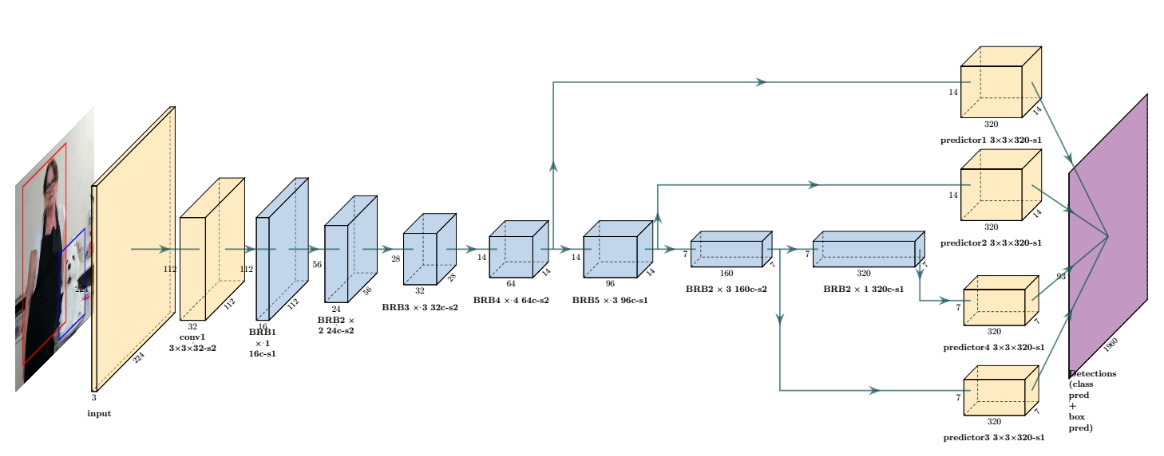

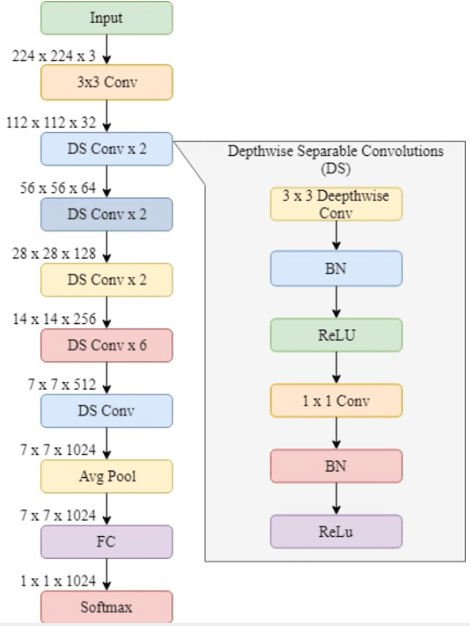

mobilenetv2_1.00_224

In [ ]:

mn_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    #alpha=1.0,
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    #classifier_activation="softmax",
)


for layer in pretrained_model.layers:
  layer.trainable=False

mn_model.add(pretrained_model)
mn_model.add(Flatten())
mn_model.add(Dense(2,activation='softmax'))

In [ ]:
mn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Using Adam optimiser
opt = Adam(lr=0.003)
mn_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
His = mn_model.fit_generator(steps_per_epoch=20,generator=train_generator, validation_data=validation_generator, validation_steps=10,epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
20/20 [==============================] - 46s 2s/step - loss: 0.3041 - accuracy: 0.8737 - val_loss: 0.6643 - val_accuracy: 0.7250
Epoch 2/20
20/20 [==============================] - 24s 1s/step - loss: 0.1822 - accuracy: 0.9264
Epoch 3/20
20/20 [==============================] - 24s 1s/step - loss: 0.1620 - accuracy: 0.9380
Epoch 4/20
20/20 [==============================] - 24s 1s/step - loss: 0.1234 - accuracy: 0.9590
Epoch 5/20
20/20 [==============================] - 24s 1s/step - loss: 0.1354 - accuracy: 0.9517
Epoch 6/20
20/20 [==============================] - 24s 1s/step - loss: 0.1182 - accuracy: 0.9576
Epoch 7/20
20/20 [==============================] - 24s 1s/step - loss: 0.1157 - accuracy: 0.9597
Epoch 8/20
20/20 [==============================] - 24s 1s/step - loss: 0.1203 - accuracy: 0.9573
Epoch 9/20
20/20 [==============================] - 24s 1s/step - loss: 0.1210 - accuracy: 0.9550
Epoch 10/20
20/20 [==============================] - 24s 1s/step - loss: 0.1

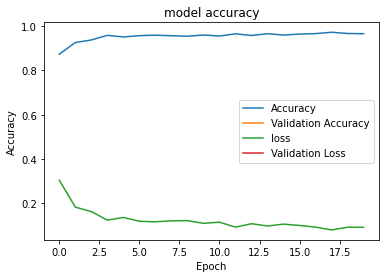

In [ ]:
import matplotlib.pyplot as plt
plt.plot(His.history['accuracy'])
plt.plot(His.history['val_accuracy'])
plt.plot(His.history['loss'])
plt.plot(His.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
mn_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.38035866618156433, 0.8274999856948853]

In [ ]:
mn_predict = mn_model.predict_generator(validation_generator)
mn_pre = np.argmax(mn_predict,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
mn_acc = accuracy_score(validation_generator.classes, mn_pre)

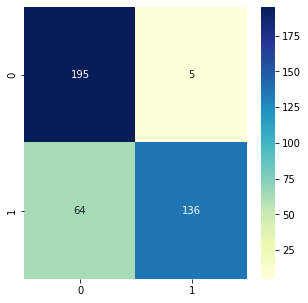


 CLASSIFICATION REPORT :


              precision    recall  f1-score   support

           0       0.75      0.97      0.85       200
           1       0.96      0.68      0.80       200

    accuracy                           0.83       400
   macro avg       0.86      0.83      0.82       400
weighted avg       0.86      0.83      0.82       400



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

mn_cm = confusion_matrix(validation_generator.classes,mn_pre)
plt.figure(figsize = (5, 5))
sns.heatmap(mn_cm, annot = True, fmt ='d', cmap = "YlGnBu")
plt.show()
mn_cr = classification_report(validation_generator.classes,mn_pre)
print('\n CLASSIFICATION REPORT :\n\n')
print(mn_cr)

In [ ]:
# mn_model.save('mn1.h5')
#mn_model.save('mn2.h5')
mn_model.save('mn3.h5')

In [ ]:
mn = load_model('mn3.h5')
mn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


# **INCEPTION V3**

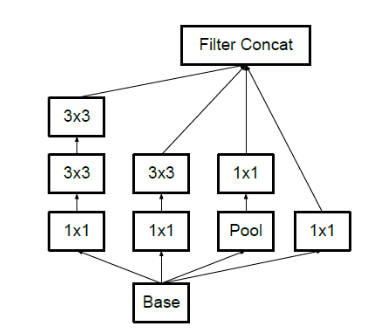

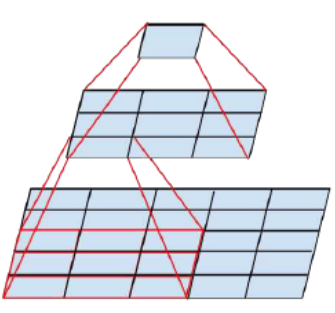

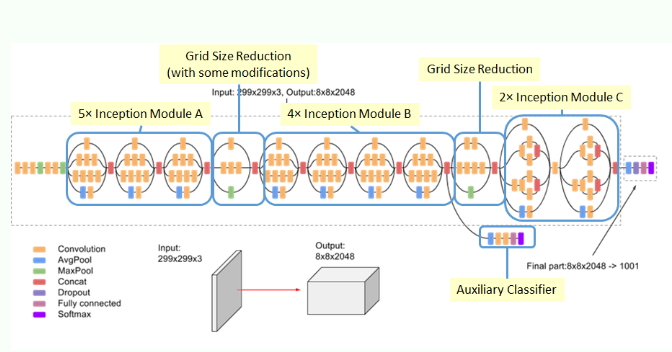

In [ ]:

i_model = Sequential()

pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(299,299,3),
    pooling="max",
    classes=1000,
    #classifier_activation="softmax",
)


for layer in pretrained_model.layers:
  layer.trainable=False

i_model.add(pretrained_model)
i_model.add(Flatten())
i_model.add(Dense(2,activation='softmax'))

In [ ]:
i_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Using Adam optimiser
opt = Adam(lr=0.004)
i_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hi = i_model.fit_generator(steps_per_epoch=20,generator=train_generator, validation_data=validation_generator, validation_steps=10,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 2.4850 - accuracy: 0.6736 - val_loss: 3.0500 - val_accuracy: 0.5175
Epoch 2/10
20/20 [==============================] - 25s 1s/step - loss: 0.6597 - accuracy: 0.8393
Epoch 3/10
20/20 [==============================] - 24s 1s/step - loss: 0.4426 - accuracy: 0.8623
Epoch 4/10
20/20 [==============================] - 25s 1s/step - loss: 0.3399 - accuracy: 0.8770
Epoch 5/10
20/20 [==============================] - 25s 1s/step - loss: 0.3258 - accuracy: 0.8807
Epoch 6/10
20/20 [==============================] - 24s 1s/step - loss: 0.2789 - accuracy: 0.9000
Epoch 7/10
20/20 [==============================] - 24s 1s/step - loss: 0.2822 - accuracy: 0.8920
Epoch 8/10
20/20 [==============================] - 24s 1s/step - loss: 0.2641 - accuracy: 0.8953
Epoch 9/10
20/20 [==============================] - 24s 1s/step - loss: 0.2972 - accuracy: 0.8843
Epoch 10/10
20/20 [==============================] - 24s 1s/step - loss: 0.2

In [ ]:
i_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[1.5439175367355347, 0.5899999737739563]

In [ ]:
i_predict = i_model.predict_generator(validation_generator)
i_pre = np.argmax(i_predict,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
i_acc = accuracy_score(validation_generator.classes, i_pre)

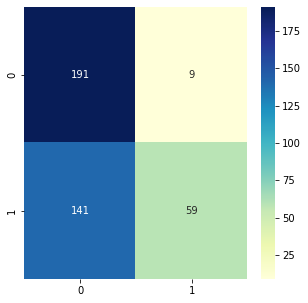


 CLASSIFICATION REPORT :


              precision    recall  f1-score   support

           0       0.58      0.95      0.72       200
           1       0.87      0.29      0.44       200

    accuracy                           0.62       400
   macro avg       0.72      0.62      0.58       400
weighted avg       0.72      0.62      0.58       400



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

i_cm = confusion_matrix(validation_generator.classes,i_pre)
plt.figure(figsize = (5, 5))
sns.heatmap(i_cm, annot = True, fmt ='d', cmap = "YlGnBu")
plt.show()
i_cr = classification_report(validation_generator.classes,i_pre)
print('\n CLASSIFICATION REPORT :\n\n')
print(i_cr)

In [ ]:
# i_model.save('i1.h5')
# i_model.save('i2.h5')
i_model.save('i3.h5')

In [ ]:
i = load_model('i3.h5')
i.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 4096)              8392704   
                                                                 
 dense_12 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_13 (Dense)            (None, 2)                 8194      
                                                                 
Total params: 46,984,994
Trainable params: 25,182,210
Non-trainable params: 21,802,784
_________________________________________________________________


# **RESULT**

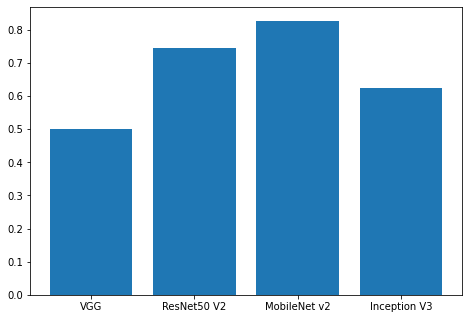

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
index = ['VGG','ResNet50 V2','MobileNet v2','Inception V3']
data=[vgg_acc,resnet_acc,mn_acc,i_acc]
ax.bar(index,data)
plt.show()